## If error downloading weights due to firewall:
Find the .deepface dicretory (https://stackoverflow.com/questions/76620093/keyerror-when-initializing-resnet-using-dlib-in-python)

Search for the weights trying to download in the error message on google/git

Download them and save them in the .deepface/weights folder



In [9]:
# import face_recognition
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import json

# from google.colab.patches import cv2_imshow

In [2]:
# TO DO, match with directory of images

In [11]:
list_patients = ['19']
patient = 'sample'

In [3]:
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/screenshots/'
image_path_1 = PATH+patient+"_1.png"
image_path_2 =  PATH+patient+"_2.png"
image_path_A =  PATH+patient+"_A.png"
image_path_phant = PATH+"phant.png"
image_path_phantcrop = PATH+ "phantcrop.png"

NameError: name 'patient' is not defined

In [ ]:
faces = DeepFace.extract_faces(image_path_1)#,model='Facenet')#,enforce_detection=False)

In [ ]:
# CT1-CT2
DeepFace.verify(img1_path = image_path_1, img2_path = image_path_2, enforce_detection=False,threshold=0.4,model_name='Facenet512')

In [7]:
# CTA-CT2
DeepFace.verify(img1_path = image_path_A, img2_path = image_path_2, enforce_detection=False,threshold=0.4,model_name='Facenet512')

{'verified': False,
 'distance': 0.7343561675462471,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 151,
   'y': 39,
   'w': 185,
   'h': 185,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.47}

In [8]:
# TO DO: DOWNLOAD WEIGHTS
# DeepFace.analyze(img_path = image_path_1, actions = ['age', 'gender', 'race', 'emotion']) 

In [15]:
# CTA-CT1
DeepFace.verify(img1_path = image_path_1, img2_path = image_path_2, enforce_detection=False,threshold=0.4)

{'verified': True,
 'distance': 0.37299415782705536,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 146,
   'y': 55,
   'w': 184,
   'h': 184,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.59}

In [10]:
faces = DeepFace.extract_faces(image_path_2)#,enforce_detection=False)
# print(faces)

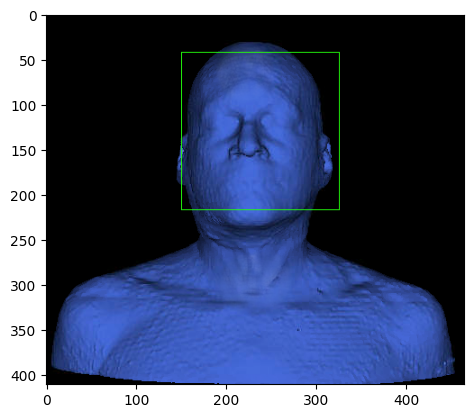

In [11]:
image = cv2.imread(image_path_2)  
x = faces[0]['facial_area']['x']
y = faces[0]['facial_area']['y']
w = faces[0]['facial_area']['w']
h = faces[0]['facial_area']['h']
image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
plt.imshow(image)

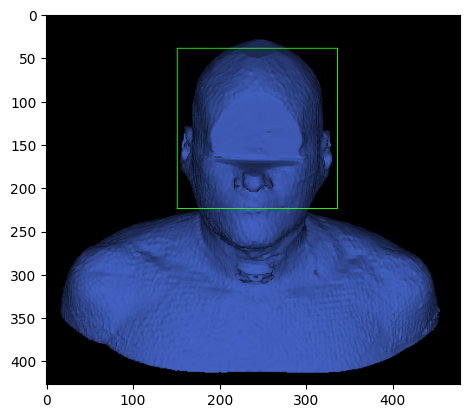

In [12]:
faces = DeepFace.extract_faces(image_path_A)#,enforce_detection=False)
image = cv2.imread(image_path_A)  
x = faces[0]['facial_area']['x']
y = faces[0]['facial_area']['y']
w = faces[0]['facial_area']['w']
h = faces[0]['facial_area']['h']
image = cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
plt.imshow(image)

In [19]:
list_patients = ['19','54','59','70','81','118','272','274','384','437','447','448']

In [14]:
DeepFace.detect_faces(img_path_1)

AttributeError: module 'deepface.DeepFace' has no attribute 'detect_faces'

In [ ]:
faces

In [ ]:
# path_data = "/data/kayla/screenshots/"
# dfs = DeepFace.find(img_path = patient+"_1.png", db_path = path_data)

In [16]:
num = ["1","2","A"]
for p in list_patients:
    for n in num:
        try:
            faces = DeepFace.extract_faces(PATH+p+"_"+n+".png")
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)


19 1 0.97
19 2 0.97
19 A 0.98
54 1 0.96
54 2 0.93
54 A 0.93
59 1 0.97
NO FACE 59 2
59 A 0.97
70 1 0.96
70 2 0.96
70 A 0.97
81 1 0.98
81 2 0.98
81 A 0.96
NO FACE 118 1
NO FACE 118 2
NO FACE 118 A
272 1 0.99
272 2 0.99
272 A 0.94
NO FACE 274 1
NO FACE 274 2
NO FACE 274 A
NO FACE 384 1
384 2 0.97
NO FACE 384 A
437 1 0.96
437 2 0.96
NO FACE 437 A
447 1 0.95
NO FACE 447 2
447 A 0.97
448 1 0.97
448 2 0.97
448 A 0.97


In [17]:
num = ["1","2","A"]
for p in list_patients:
    for n in num:
        try:
            faces = DeepFace.represent(PATH+p+"_"+n+".png")
            print(p, n, faces[0]['confidence'])
        except Exception as e:
            print("NO FACE", p,  n)


NO FACE 19 1
NO FACE 19 2
NO FACE 19 A
NO FACE 54 1
NO FACE 54 2
NO FACE 54 A
NO FACE 59 1
NO FACE 59 2
NO FACE 59 A
NO FACE 70 1
NO FACE 70 2
NO FACE 70 A
NO FACE 81 1
NO FACE 81 2
NO FACE 81 A
NO FACE 118 1
NO FACE 118 2
NO FACE 118 A
NO FACE 272 1
NO FACE 272 2
NO FACE 272 A
NO FACE 274 1
NO FACE 274 2
NO FACE 274 A
NO FACE 384 1
NO FACE 384 2
NO FACE 384 A
NO FACE 437 1
NO FACE 437 2
NO FACE 437 A
NO FACE 447 1
NO FACE 447 2
NO FACE 447 A
NO FACE 448 1
NO FACE 448 2
NO FACE 448 A


In [22]:
results_1_2 = []
results_A_2 = []

for p in list_patients:
    
    print(p)
    if p not in skip:
        result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=False,threshold=0.4)
        results_1_2.append(result['distance'])
        print("1 vs 2",result['distance'])

        result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+"_2.png", enforce_detection=False,threshold=0.4)
        results_A_2.append(result['distance'])
        print("A vs 2",result['distance'])

19
1 vs 2 0.33751287778598194
A vs 2 0.6985929364990877
54
1 vs 2 0.31930519248650346
A vs 2 0.6446925685415182
59
70
1 vs 2 0.4923657094122744
A vs 2 0.7381024442335626
81
1 vs 2 0.2502863405661846
A vs 2 0.5407558853312147
118
272
1 vs 2 0.2498792270382435
A vs 2 0.543834079026456
274
384
437
1 vs 2 0.2741522138184237
A vs 2 0.7684445117547534
447
448
1 vs 2 0.2127920073760261
A vs 2 0.6574005877947428


In [23]:
dict_emb = {}
colours = ['red','blue','magenta','cyan','orange','lime','yellow','green','purple','salmon','cadetblue','olive']

for i, p in enumerate(list_patients):
    dict_emb[p] = {}
    for n in num:
        dict_emb[p][n] = {}
        dict_emb[p][n]['colour'] = colours[i]
#         dict_emb[p][n]['n'] = n
        
      
        #embeddings
        embedding_objs = DeepFace.represent(img_path = PATH+p+"_"+n+".png", enforce_detection=False) 
#                 detector_backend = 'dlib'
#         )
        print(p,n,embedding_objs[0]['face_confidence'])
        dict_emb[p][n]['embedding'] = embedding_objs[0]['embedding']

19 1 0.97
19 2 0.97
19 A 0.98
54 1 0.96
54 2 0.93
54 A 0.93
59 1 0.97
59 2 0
59 A 0.97
70 1 0.96
70 2 0.96
70 A 0.97
81 1 0.98
81 2 0.98
81 A 0.96
118 1 0
118 2 0
118 A 0
272 1 0.99
272 2 0.99
272 A 0.94
274 1 0
274 2 0
274 A 0
384 1 0
384 2 0.97
384 A 0
437 1 0.96
437 2 0.96
437 A 0
447 1 0.95
447 2 0
447 A 0.97
448 1 0.97
448 2 0.97
448 A 0.97


In [20]:
skip = ['118','274','384','59','447']

In [ ]:
# DeepFace.extract_faces(image_path_1)

In [ ]:
# dict_emb

In [28]:


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [29]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["1","2"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [30]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


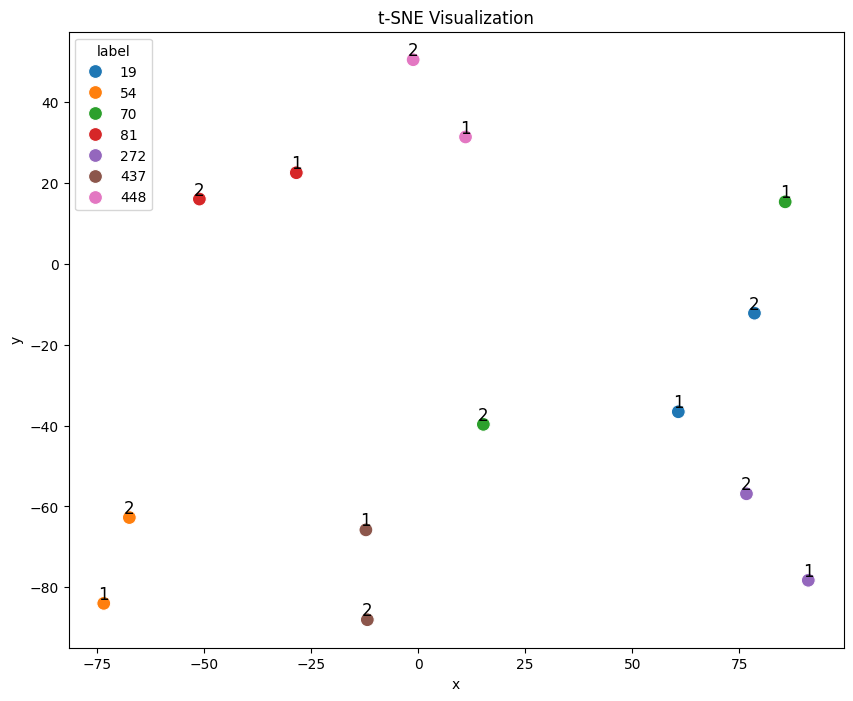

In [31]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [32]:
len(X)

14

In [33]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["A","2"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [34]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


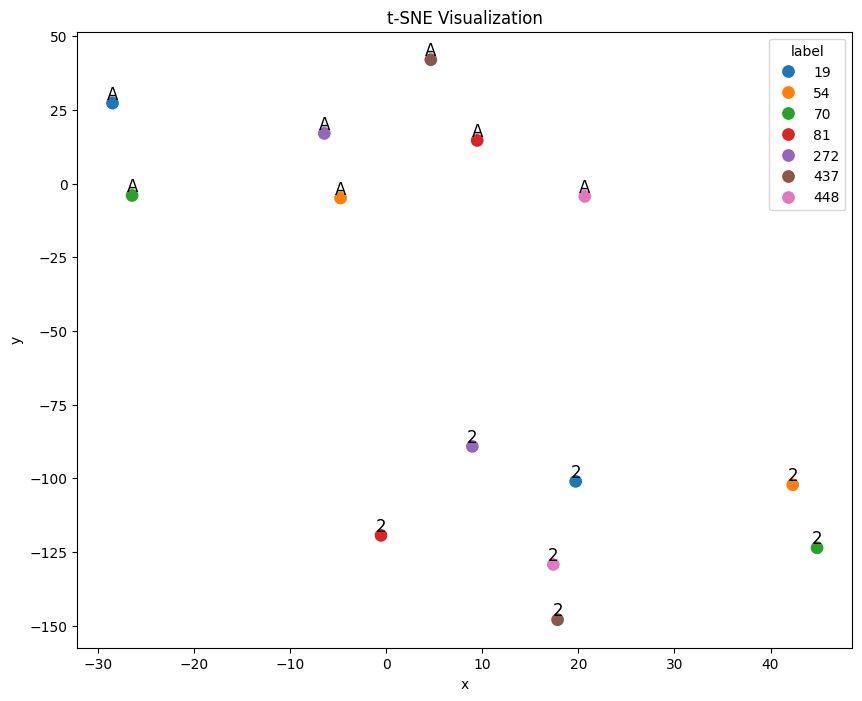

In [35]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [36]:
X = []
c = []
y = []
labels = []
for p in [x for x in dict_emb if x not in skip]:
    for n in ["A","2","1"]:
#     print([p])
        X.append(dict_emb[p][n]['embedding'])
        c.append(dict_emb[p][n]['colour'])
        y.append(p)
        labels.append(n)

In [37]:
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
X_tsne = tsne.fit_transform(np.array(X))

# Create a DataFrame for plotting
embeddings_df = pd.DataFrame(X_tsne, columns=["x", "y"])
embeddings_df["label"] = y


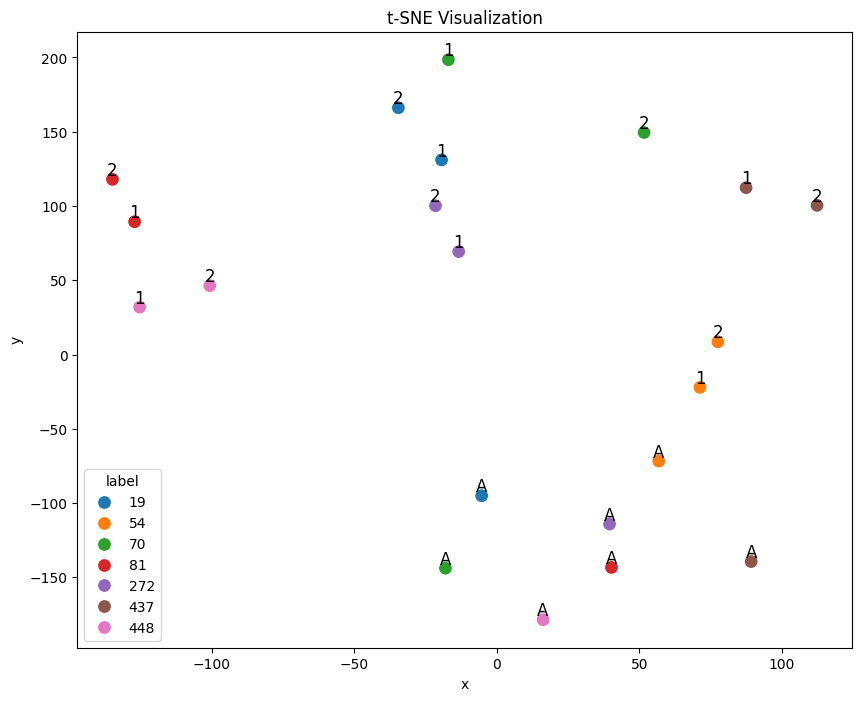

In [38]:

# Scatter plot with colors
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="x", y="y",s=100, hue="label", palette="tab10", data=embeddings_df, alpha=1)
# Add labels to each point
x = [item[0] for item in X_tsne]
y = [item[1] for item in X_tsne]
for i, txt in enumerate(labels):
    plt.text(x[i], y[i], txt, fontsize=12, ha='center', va='bottom')
plt.title("t-SNE Visualization")
plt.show()

In [39]:
distances = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
    list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances.append(result['distance'])

19 vs 54 0.47446463209440604
19 vs 70 0.5511579832270747
19 vs 81 0.4994576312309925
19 vs 272 0.39422255955917984
19 vs 437 0.49373151542840266
19 vs 448 0.4966225680300065
54 vs 70 0.4992157493755953
54 vs 81 0.557484989011276
54 vs 272 0.532869852953495
54 vs 437 0.5499990431467625
54 vs 448 0.6017813978297268
70 vs 81 0.7507811944034319
70 vs 272 0.607881218149655
70 vs 437 0.5806626073871721
70 vs 448 0.5005227857601451
81 vs 272 0.5050856360177993
81 vs 437 0.5471275701580688
81 vs 448 0.46920605743071375
272 vs 437 0.6298349082712371
272 vs 448 0.5861835847996679
437 vs 448 0.4817380590142524


In [40]:
np.mean(distances)

0.5385729306323362

In [41]:
np.mean(results_1_2)

0.3051847954976625

In [42]:
np.mean(results_A_2)

0.6559747161687622

In [43]:
len(results_A_2)

7

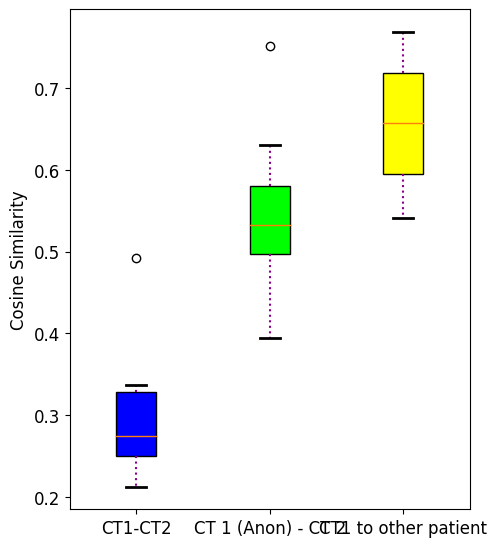

In [55]:
data = [results_1_2, distances,results_A_2]
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(4,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [45]:
same_image =[]


list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:

    result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p1+'_1.png', enforce_detection=False,threshold=0.4)
    print(p1,"1 vs 1",result['distance'])
    same_image.append(result['distance'])

19 1 vs 1 0.0
54 1 vs 1 -2.220446049250313e-16
70 1 vs 1 2.220446049250313e-16
81 1 vs 1 0.0
272 1 vs 1 1.1102230246251565e-16
437 1 vs 1 0.0
448 1 vs 1 2.220446049250313e-16


In [46]:
distances_2_1_other = []
list_to_do = list_patients.copy()
for p1 in [p for p in list_patients if p not in skip]:
#     list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p not in skip and p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        print(p1,"vs",p2,result['distance'])
        distances_2_1_other.append(result['distance'])

19 vs 54 0.48890561497980367
19 vs 70 0.43113179034248794
19 vs 81 0.4865805041696747
19 vs 272 0.22366109493647668
19 vs 437 0.575591546727991
19 vs 448 0.3890026200643073
54 vs 19 0.47793568246626295
54 vs 70 0.5512119347506736
54 vs 81 0.6012282186780455
54 vs 272 0.5076429122726083
54 vs 437 0.5071051727407361
54 vs 448 0.6499456293949728
70 vs 19 0.3979541570215408
70 vs 54 0.5434322671137787
70 vs 81 0.6720801011196291
70 vs 272 0.5785289691350262
70 vs 437 0.667000163149585
70 vs 448 0.6024961540742135
81 vs 19 0.5081618448777717
81 vs 54 0.5482713277071409
81 vs 70 0.639627157443414
81 vs 272 0.4464708928148188
81 vs 437 0.5355470297059288
81 vs 448 0.3157109242502083
272 vs 19 0.5007280165707072
272 vs 54 0.620529384117657
272 vs 70 0.7491128546113829
272 vs 81 0.5761308615390388
272 vs 437 0.6251243576243011
272 vs 448 0.7251506482131469
437 vs 19 0.5146091608016685
437 vs 54 0.4225201814759916
437 vs 70 0.4226979940655847
437 vs 81 0.4978827321225978
437 vs 272 0.60734912133

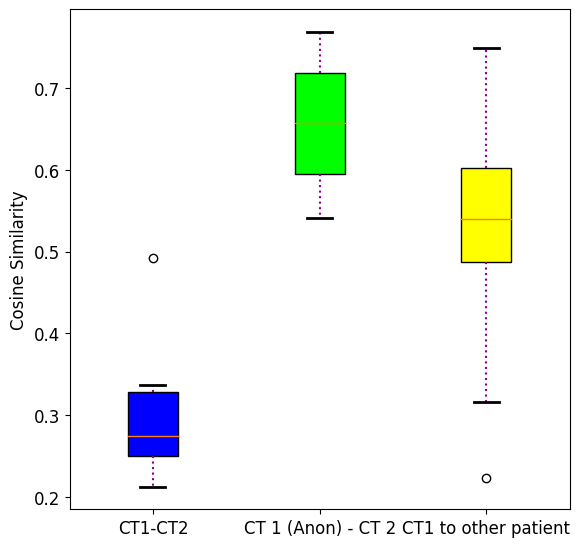

In [47]:
data = [results_1_2, results_A_2,distances_2_1_other]
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [48]:
# CT1-CT2
DeepFace.verify(img1_path = image_path_2, img2_path = PATH+'ctp.png', enforce_detection=False,threshold=0.4,model_name='Facenet512')

{'verified': True,
 'distance': 0.2384420373993411,
 'threshold': 0.4,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 150,
   'y': 42,
   'w': 175,
   'h': 175,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 130,
   'y': 39,
   'w': 155,
   'h': 155,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.47}

### New cohort


In [4]:
list_patients = ['118','272','437','447','462','600','625','628',
                 '633','638','644','651','673','685','734','755',
                 '790','848','892','910','965','946','961','1288',
                 '1314','1502','1763','1892','2037','2056']#['19','54','59','70','81','118','272','274','384','437','447','448']
print(len(list_patients)) # skipping 877 as covered by bolus

30


In [5]:
skip = []

In [6]:
# detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet",
]

full_results = {}

for backend in backends:
    full_results[backend] = {}
    for model in models:
        print("Testing",backend,"backend, and",model,"model.")
        results_p = []
        num_undetected = 0
        for p in list_patients: 
            try:
                result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=True,threshold=0.4,detector_backend = backend,model_name=model)
                results_p.append(result['distance'])
            except:
                num_undetected+=1
        full_results[backend][model] = {
            "results": results_p,
            "undetected":num_undetected
        }
        

Testing opencv backend, and VGG-Face model.


2024-09-25 18:33:10.820667: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-25 18:33:11.123490: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-25 18:33:11.220010: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-09-25 18:33:12.372705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


Testing opencv backend, and Facenet model.
Testing opencv backend, and Facenet512 model.
Testing opencv backend, and OpenFace model.
Testing opencv backend, and DeepFace model.
Testing opencv backend, and DeepID model.
Testing opencv backend, and ArcFace model.
Testing opencv backend, and Dlib model.
Testing opencv backend, and SFace model.
Testing opencv backend, and GhostFaceNet model.
Testing ssd backend, and VGG-Face model.
Testing ssd backend, and Facenet model.
Testing ssd backend, and Facenet512 model.
Testing ssd backend, and OpenFace model.
Testing ssd backend, and DeepFace model.
Testing ssd backend, and DeepID model.
Testing ssd backend, and ArcFace model.
Testing ssd backend, and Dlib model.
Testing ssd backend, and SFace model.
Testing ssd backend, and GhostFaceNet model.
Testing dlib backend, and VGG-Face model.
Testing dlib backend, and Facenet model.
Testing dlib backend, and Facenet512 model.
Testing dlib backend, and OpenFace model.
Testing dlib backend, and DeepFace 

Downloading...
From: https://github.com/opencv/opencv_zoo/raw/main/models/face_detection_yunet/face_detection_yunet_2023mar.onnx
To: /home/kayla/.deepface/weights/face_detection_yunet_2023mar.onnx
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233k/233k [00:00<00:00, 39.6MB/s]


Testing yunet backend, and Facenet model.
Testing yunet backend, and Facenet512 model.
Testing yunet backend, and OpenFace model.
Testing yunet backend, and DeepFace model.
Testing yunet backend, and DeepID model.
Testing yunet backend, and ArcFace model.
Testing yunet backend, and Dlib model.
Testing yunet backend, and SFace model.
Testing yunet backend, and GhostFaceNet model.
Testing centerface backend, and VGG-Face model.
24-09-25 19:01:27 - Downloading CenterFace weights from https://github.com/Star-Clouds/CenterFace/raw/master/models/onnx/centerface.onnx to /home/kayla/.deepface/weights/centerface.onnx...


Downloading...
From: https://github.com/Star-Clouds/CenterFace/raw/master/models/onnx/centerface.onnx
To: /home/kayla/.deepface/weights/centerface.onnx
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7.53M/7.53M [00:00<00:00, 33.9MB/s]


24-09-25 19:01:28 - CenterFace model is just downloaded to centerface.onnx
Testing centerface backend, and Facenet model.
Testing centerface backend, and Facenet512 model.
Testing centerface backend, and OpenFace model.
Testing centerface backend, and DeepFace model.
Testing centerface backend, and DeepID model.
Testing centerface backend, and ArcFace model.
Testing centerface backend, and Dlib model.
Testing centerface backend, and SFace model.
Testing centerface backend, and GhostFaceNet model.


In [17]:
for backend in full_results:
    print(backend,":",full_results[backend][models[0]]['undetected'],"undetected.")
    # retina face, opencv and dlib are the best.
    

opencv : 4 undetected.
ssd : 18 undetected.
dlib : 3 undetected.
mtcnn : 30 undetected.
fastmtcnn : 30 undetected.
retinaface : 3 undetected.
mediapipe : 30 undetected.
yolov8 : 30 undetected.
yunet : 25 undetected.
centerface : 20 undetected.


In [29]:
for model in full_results['opencv']:
    print(len(full_results['opencv'][model]['results']))

26
26
26
26
0
26
26
26
26
26


In [38]:

def plot_results_model(full_results,detector):
    # opencv
    data = [full_results[detector][m]['results'] for m in models]

    plt.rcParams['font.size'] = 12.
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes([0,0,1,1])
    
    # Create the boxplot
    bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)
    
    # Changing color and line width of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")
    
    # Changing color and line width of caps
    for cap in bp['caps']:
        cap.set(color ='black',
                linewidth = 2)
    
    ax.set_xticklabels(models)
    plt.ylabel("Cosine Similarity")
    plt.title("Model performances for"+detector+"detector")
    plt.show()

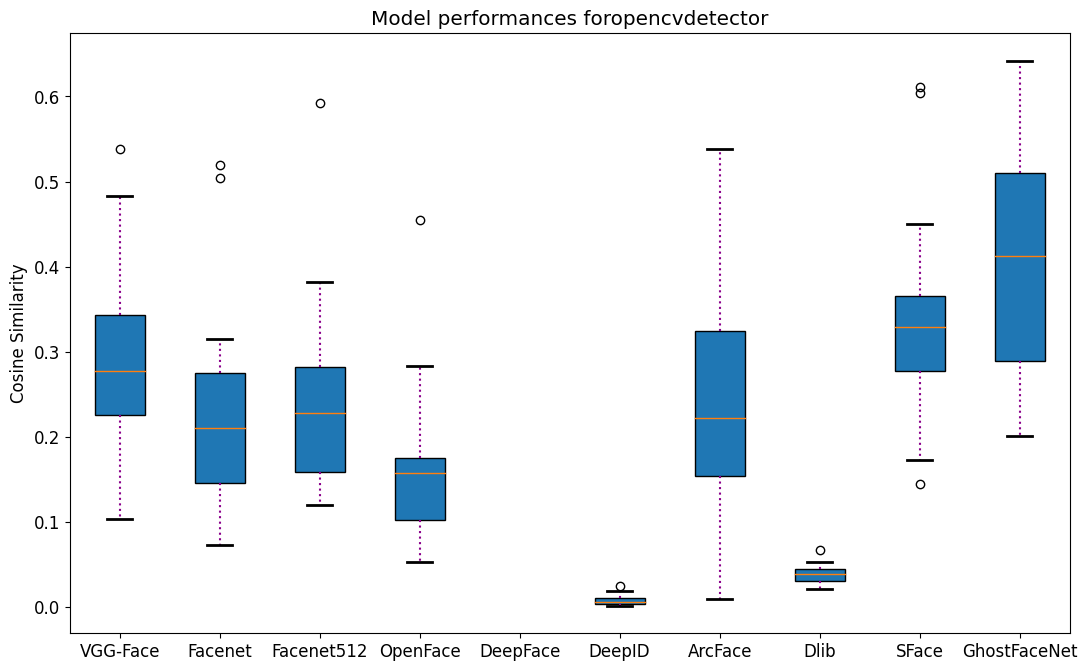

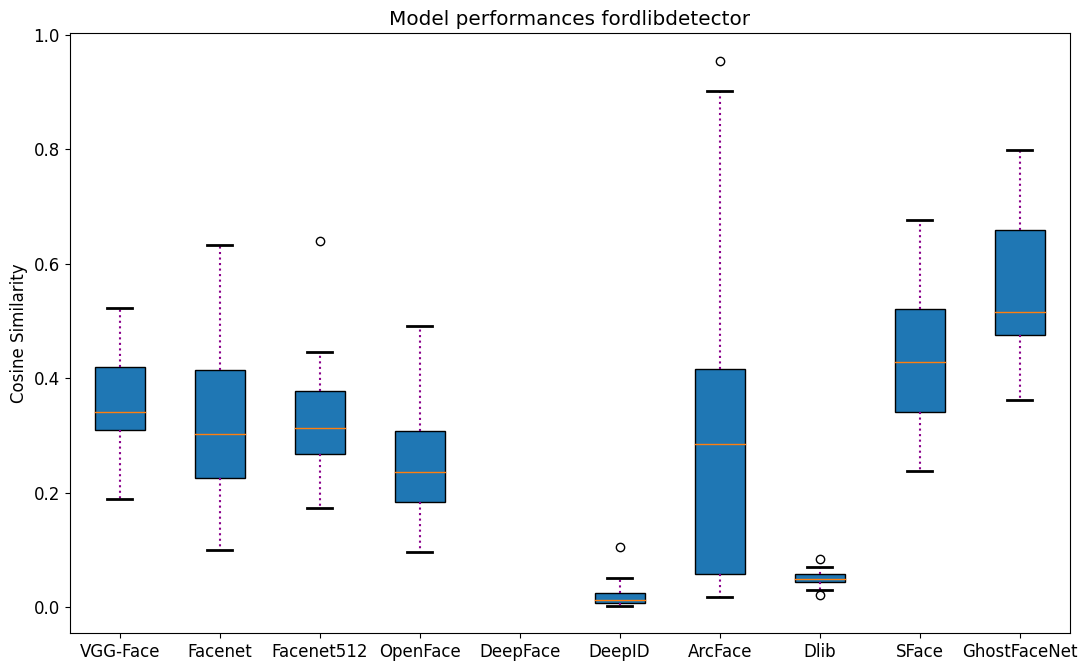

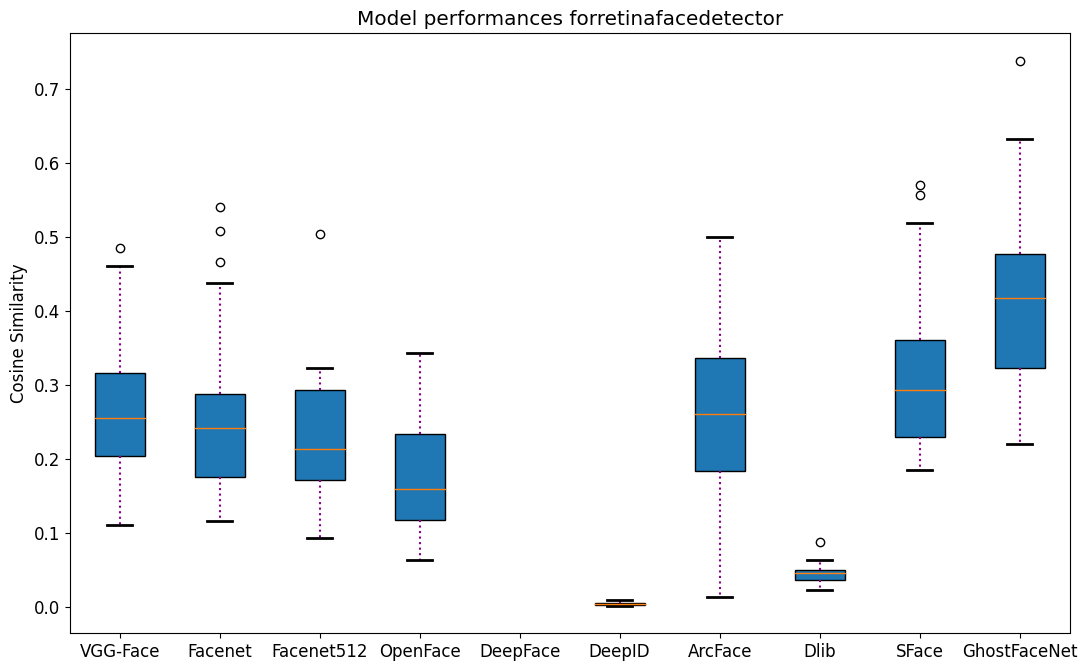

In [40]:
plot_results_model(full_results, 'opencv')
plot_results_model(full_results, 'dlib')
plot_results_model(full_results, 'retinaface')

In [10]:
# Convert and write JSON object to file
with open("deepface_model_tests.json", "w") as outfile: 
    json.dump(full_results, outfile)

In [102]:
for p in [l for l in list_patients if l not in skip]:
    print(p)

    try:
        detect_1 = DeepFace.extract_faces(PATH+p+"_1.png", detector_backend = detectors[4])
        print("1:",detect_1[0]['facial_area'],detect_1[0]['confidence'])
    except:
        print("1: No face detected")

    try:
        detect_2 = DeepFace.extract_faces(PATH+p+"_2.png", detector_backend = detectors[4])    
        print("2:",detect_2[0]['facial_area'],detect_2[0]['confidence'])
    except:
        
        print("2: No face detected")
    

118
1: {'x': 190, 'y': 69, 'w': 127, 'h': 176, 'left_eye': (280, 138), 'right_eye': (224, 132)} 1.0
2: {'x': 163, 'y': 47, 'w': 124, 'h': 166, 'left_eye': (252, 104), 'right_eye': (197, 103)} 1.0
272
1: {'x': 170, 'y': 65, 'w': 144, 'h': 183, 'left_eye': (273, 135), 'right_eye': (208, 132)} 1.0
2: {'x': 169, 'y': 71, 'w': 129, 'h': 160, 'left_eye': (266, 123), 'right_eye': (208, 125)} 1.0
437
1: {'x': 177, 'y': 60, 'w': 126, 'h': 178, 'left_eye': (267, 125), 'right_eye': (209, 123)} 1.0
2: {'x': 170, 'y': 38, 'w': 140, 'h': 199, 'left_eye': (276, 115), 'right_eye': (212, 115)} 1.0
447
1: {'x': 190, 'y': 42, 'w': 136, 'h': 189, 'left_eye': (294, 116), 'right_eye': (229, 115)} 1.0
2: {'x': 184, 'y': 63, 'w': 117, 'h': 154, 'left_eye': (270, 117), 'right_eye': (218, 116)} 1.0
462
1: {'x': 166, 'y': 68, 'w': 147, 'h': 199, 'left_eye': (278, 149), 'right_eye': (212, 148)} 1.0
2: {'x': 189, 'y': 87, 'w': 138, 'h': 179, 'left_eye': (292, 153), 'right_eye': (227, 153)} 1.0
600
1: {'x': 179, 'y

In [103]:
for p in [l for l in list_patients if l not in skip]:
    print(p)

    try:
        detect_1 = DeepFace.extract_faces(PATH+p+"_1.png", detector_backend = detectors[0])
        print("1:",detect_1[0]['facial_area'],detect_1[0]['confidence'])
    except:
        print("1: No face detected")

    try:
        detect_2 = DeepFace.extract_faces(PATH+p+"_2.png", detector_backend = detectors[0])    
        print("2:",detect_2[0]['facial_area'],detect_2[0]['confidence'])
    except:
        
        print("2: No face detected")
    

118
1: No face detected
2: {'x': 148, 'y': 31, 'w': 169, 'h': 169, 'left_eye': None, 'right_eye': None} 0.98
272
1: {'x': 147, 'y': 48, 'w': 187, 'h': 187, 'left_eye': None, 'right_eye': None} 0.96
2: {'x': 156, 'y': 44, 'w': 163, 'h': 163, 'left_eye': None, 'right_eye': None} 0.96
437
1: {'x': 150, 'y': 51, 'w': 174, 'h': 174, 'left_eye': None, 'right_eye': None} 0.95
2: {'x': 153, 'y': 36, 'w': 179, 'h': 179, 'left_eye': None, 'right_eye': None} 0.95
447
1: {'x': 168, 'y': 35, 'w': 185, 'h': 185, 'left_eye': None, 'right_eye': None} 0.95
2: {'x': 160, 'y': 41, 'w': 170, 'h': 170, 'left_eye': None, 'right_eye': None} 0.96
462
1: {'x': 143, 'y': 64, 'w': 196, 'h': 196, 'left_eye': None, 'right_eye': None} 0.97
2: {'x': 159, 'y': 63, 'w': 196, 'h': 196, 'left_eye': None, 'right_eye': None} 0.96
600
1: {'x': 160, 'y': 47, 'w': 192, 'h': 192, 'left_eye': None, 'right_eye': None} 0.99
2: {'x': 139, 'y': 65, 'w': 199, 'h': 199, 'left_eye': None, 'right_eye': None} 0.97
625
1: {'x': 195, 'y'

In [109]:
results_1_2 = []
# results_A_2 = []

for p in list_patients:
    
    print(p)
    try:
        result = DeepFace.verify(img1_path = PATH+p+"_1.png", img2_path = PATH+p+'_2.png', enforce_detection=True,threshold=0.4,detector_backend = detectors[4])
        results_1_2.append(result['distance'])
        print("1 vs 2",result['distance'])
    except:
        print("NO FACE")
        # result = DeepFace.verify(img1_path = PATH+p+"_A.png", img2_path = PATH+p+"_2.png", enforce_detection=False,threshold=0.4)
        # results_A_2.append(result['distance'])
        # print("A vs 2",result['distance'])

118
1 vs 2 0.15215399715564604
272
1 vs 2 0.3252370655874649
437
1 vs 2 0.25564019563722773
447
1 vs 2 0.18599447776312406
462
1 vs 2 0.27144565196084636
600
1 vs 2 0.48502328626040436
625
1 vs 2 0.2218798825563819
628
1 vs 2 0.1105535695812
633
NO FACE
638
NO FACE
644
1 vs 2 0.20979919127921043
651
1 vs 2 0.300468278129025
673
1 vs 2 0.1448040417625548
685
1 vs 2 0.2841221333848969
734
1 vs 2 0.31209055564837207
755
1 vs 2 0.460214785449263
790
1 vs 2 0.19817677427786828
848
1 vs 2 0.2129475973269661
877
NO FACE
892
1 vs 2 0.3188146334157571
910
1 vs 2 0.24923777386548984
965
1 vs 2 0.3825100923067184
946
1 vs 2 0.27701310547544333
961
1 vs 2 0.1581027977656645
1288
1 vs 2 0.15591951513517188
1314
1 vs 2 0.210756032223665
1502
NO FACE
1763
1 vs 2 0.36573348724673593
1892
1 vs 2 0.25735677027580905
2037
1 vs 2 0.22327869548863133
2056
1 vs 2 0.42970649712545483


In [75]:
distances = []
list_to_do = list_patients.copy()
for p1 in list_patients:
    list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_2.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        # print(p1,"vs",p2,result['distance'])
        distances.append(result['distance'])

        if result['distance'] < 0.4:
            print(p1,p2, result['distance'])
            


118 447 0.2460139329240152
118 462 0.20979735645933217
118 651 0.31598237313309385
118 1314 0.30694705019443036
272 651 0.3647032216490611
272 685 0.39933194222195456
272 946 0.37744722318919144
272 961 0.3990557483408157
272 2056 0.3733256155474509
447 462 0.2696736735195139
447 651 0.25730344791922166
447 1314 0.34721329453730654
462 600 0.3792010171347123
462 651 0.29689368611868694
462 1314 0.3915920288038133
625 638 0.39333557167065636
625 644 0.3993736826016958
625 734 0.23298243186222123
625 848 0.39788740816943124
625 1288 0.3258820767843038
625 2056 0.28222069374116143
628 638 0.3934271396507618
628 892 0.3707018227542894
633 961 0.3850461467791131
633 1763 0.335815140681314
644 685 0.326874098245058
644 734 0.3409242638541655
644 965 0.3608843506956503
644 946 0.37226166542417416
644 1288 0.3309337088325396
644 2056 0.30836236221844715
651 946 0.3850604851027085
651 961 0.3787820840046091
651 1314 0.33674534491881103
651 1892 0.3911920809948175
685 790 0.38178693834723143
685

In [78]:
stances_2_1_other = []
list_to_do = list_patients.copy()
for p1 in list_patients:
#     list_to_do.remove(p1)
    for p2 in [p for p in list_to_do if p != p1]:
        result = DeepFace.verify(img1_path = PATH+p1+"_1.png", img2_path = PATH+p2+'_2.png', enforce_detection=False,threshold=0.4)
        # print(p1,"vs",p2,result['distance'])
        distances_2_1_other.append(result['distance'])

        if result['distance'] < 0.4:
            print(p1,p2, result['distance'])

118 673 0.18730585939258515
272 961 0.39869464953061384
447 118 0.32036885584412045
447 462 0.2937623119723294
447 600 0.3449992264701246
447 651 0.22972518448267742
447 1314 0.33920428586232165
447 1892 0.3967802620710551
462 118 0.325432182362718
462 651 0.30808266461547507
462 685 0.34361741159823866
462 965 0.3828504224199145
462 946 0.39442064775661745
462 1892 0.3701746045651182
600 272 0.396624073870941
600 644 0.24736781747035708
600 685 0.2656999660497483
600 790 0.3673396919910672
600 965 0.3452436943695649
600 1763 0.37686117526626817
600 2056 0.3795167256533146
625 644 0.3552293734711679
625 734 0.20276955646831285
625 2056 0.34778495197168013
628 790 0.32417231069297137
628 1763 0.3989152554519221
638 625 0.3500253375251836
638 628 0.3331720452535176
638 633 0.36109529652461203
638 892 0.3719867855505158
644 625 0.328593602322205
644 734 0.26624542570655774
644 848 0.31555606670433456
644 1288 0.24636038285809636
644 2056 0.3212620569920066
651 644 0.3456455654942445
651 7

In [ ]:
skip = ['118',']

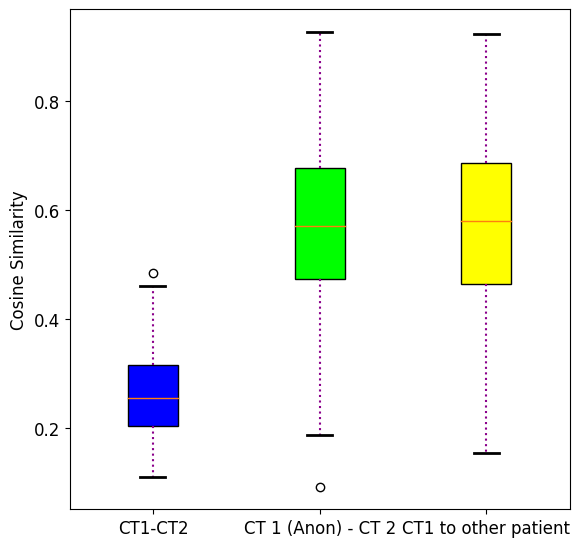

In [110]:
data = [results_1_2, distances, distances_2_1_other]#, results_A_2,
plt.rcParams['font.size'] = 12.
# Create a figure instance
fig = plt.figure(figsize=(5,5))

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.boxplot(data,patch_artist=True)#, vert=True, patch_artist=True, notch=True, bootstrap=5)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# # Changing color and line width of medians
# for median in bp['medians']:
#     median.set(color ='red',
#                linewidth = 3)

# # Changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#                color ='#e7298a',
#                alpha = 0.5)
    
# # x-axis labels
ax.set_xticklabels(['CT1-CT2', 'CT 1 (Anon) - CT 2', 'CT1 to other patient'])
plt.ylabel("Cosine Similarity")
# # Adding title
# plt.title("Vertical Box plot")

# # Removing top axes and right axes
# # ticks
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()

# show plot
plt.show()

In [33]:
len(list_patients)

19